# 基于Kaggle案例“Rental Listing Inquiries”的EDA&FE报告

#### 15336036 15网络工程 范述治
---

## 介绍
本报告的主要内容是对Kaggle案例“Rental Listing Inquiries”提供的数据集进行FE（特征工程）和EDA（探索性数据分析）。
报告主要分为以下几个部分：
1. **准备工作**：准备数据分析所需环境，导入数据
2. **观察数据形式**：查看数据集的组成和大小，识别特征和目标变量
3. **初步的预处理和FE**：对数据进行基本的预处理，根据原始数据的特征进行初步的新特征构造
4. **可视化EDA和进一步的FE**：对特征进行可视化，观察并分析可视化结果，在此基础上进行进一步的特征构造
5. **小结**：简要总结整个工作。
---

## 准备工作
本次作业中主要用到了以下软件及环境：
- 语言：Python 3.6
- 库：`pandas`、`numpy`、`matplotlib`、`seaborn`、`wordcloud`
- 报告编辑环境（包含图表生成）：Jupyter Notebook

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from wordcloud import WordCloud

pd.options.mode.chained_assignment = None         # 禁用pandas的Warning
color = sbn.color_palette()                       # 获取绘制图表时使用的颜色
sbn.set(style="whitegrid", color_codes=True)      # 设置图表样式
sbn.set(font_scale=1)                             # 设置字体放缩比例

# Load data
train = pd.read_json('../../KaggleData/competitions/two-sigma-connect-rental-listing-inquiries/train.json')
test = pd.read_json('../../KaggleData/competitions/two-sigma-connect-rental-listing-inquiries/test.json')

环境配置成功后，从本地文件夹内读入数据，即可开始数据分析。

---

## 观察数据形式

In [2]:
train.head().T

,10,10000,100004,100007,100013
bathrooms,1.5,1,1,1,1
bedrooms,3,2,1,1,4
building_id,53a5b119ba8f7b61d4e010512e0dfc85,c5c8a357cba207596b04d1afd1e4f130,c3ba40552e2120b0acfc3cb5730bb2aa,28d9ad350afeaab8027513a3e52ac8d5,0
created,2016-06-24 07:54:24,2016-06-12 12:19:27,2016-04-17 03:26:41,2016-04-18 02:22:02,2016-04-28 01:32:41
description,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,,"Top Top West Village location, beautiful Pre-w...",Building Amenities - Garage - Garden - fitness...,Beautifully renovated 3 bedroom flex 4 bedroom...
display_address,Metropolitan Avenue,Columbus Avenue,W 13 Street,East 49th Street,West 143rd Street
features,[],"[Doorman, Elevator, Fitness Center, Cats Allow...","[Laundry In Building, Dishwasher, Hardwood Flo...","[Hardwood Floors, No Fee]",[Pre-War]
interest_level,medium,low,high,low,low
latitude,40.7145,40.7947,40.7388,40.7539,40.8241
listing_id,7211212,7150865,6887163,6888711,6934781


In [3]:
test.head().T

,0,1,100,1000,100000
bathrooms,1,1,1,1,2
bedrooms,1,2,1,2,2
building_id,79780be1514f645d7e6be99a3de696c5,0,3dbbb69fd52e0d25131aa1cd459c87eb,783d21d013a7e655bddc4ed0d461cc5e,6134e7c4dd1a98d9aee36623c9872b49
created,2016-06-11 05:29:41,2016-06-24 06:36:34,2016-06-03 04:29:40,2016-06-11 06:17:35,2016-04-12 05:24:17
description,Large with awesome terrace--accessible via bed...,Prime Soho - between Bleecker and Houston - Ne...,New York chic has reached a new level ...,Step into this fantastic new Construction in t...,"~Take a stroll in Central Park, enjoy the ente..."
display_address,Suffolk Street,Thompson Street,101 East 10th Street,South Third Street\r,"Midtown West, 8th Ave"
features,"[Elevator, Laundry in Building, Laundry in Uni...","[Pre-War, Dogs Allowed, Cats Allowed]","[Doorman, Elevator, No Fee]","[Roof Deck, Balcony, Elevator, Laundry in Buil...","[Common Outdoor Space, Cats Allowed, Dogs Allo..."
latitude,40.7185,40.7278,40.7306,40.7109,40.765
listing_id,7142618,7210040,7103890,7143442,6860601
longitude,-73.9865,-74,-73.989,-73.9571,-73.9845


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 4.3+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74659 entries, 0 to 99999
Data columns (total 14 columns):
bathrooms          74659 non-null float64
bedrooms           74659 non-null int64
building_id        74659 non-null object
created            74659 non-null object
description        74659 non-null object
display_address    74659 non-null object
features           74659 non-null object
latitude           74659 non-null float64
listing_id         74659 non-null int64
longitude          74659 non-null float64
manager_id         74659 non-null object
photos             74659 non-null object
price              74659 non-null int64
street_address     74659 non-null object
dtypes: float64(3), int64(3), object(8)
memory usage: 6.3+ MB


以上信息提供了训练集和测试集的数据集的构成、大小，以及目标变量——`interest_level`；另外还提供了各个特征的数据类型，以及是否含有空值。下面简单查看数据集中数值型数据的统计情况。

---

In [6]:
# Statistic of numeric data
train.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


从统计信息中发现，除了`listing_id`之外的其他的五个数值型数据都存在一些离群点，离群程度不同，`price`的max值离群程度最大，在后续的分析中应当做相应的处理。

---

接下来考虑特征的实际意义与目标变量的关系。注意到特征中存在三个ID型特征`listing_id`、`building_id`、`manager_id`，由于不知道这些ID型数据是否唯一，无法评估该特征对预测模型是否有贡献。例如，如果`listing_id`是唯一的，那么该数据对预测模型来说几乎没有用处，可以将其排除。因此，我们接下来就对三个ID型特征进行观察分析。

In [7]:
# Values counting
train['listing_id'].value_counts().shape

(49352,)

训练集中`listing_id`的不同值的个数与训练集的数据条数相等，因此可以认为这是每条数据唯一的ID值，作用相当于索引，因此将其从特征集中排除。

In [8]:
train['building_id'].value_counts().shape

(7585,)

In [9]:
train['building_id'].value_counts().nlargest(20)

0                                   8286
96274288c84ddd7d5c5d8e425ee75027     275
11e1dec9d14b1a9e528386a2504b3afc     215
80a120d6bc3aba97f40fee8c2204524b     213
bb8658a3e432fb62a440615333376345     212
f68bf347f99df026f4faad43cc604048     191
c94301249b8c09429d329864d58e5b82     167
ce6d18bf3238e668b2bf23f4110b7b67     165
57ef86c28a8ae482dc3a3c3af28e8e48     159
128d4af0683efc5e1eded8dc8044d5e3     153
d0234abbc01a982d54e8d446acc03405     152
9c18bf871b97492b96d8ddb800591f1b     147
8e3b8c607c3edcf3de131c24f0390179     141
cb14c4f807f23ecee1f7469b5159d2de     141
ea9045106c4e1fe52853b6af941f1c69     139
7967a1280bf3f7644500fc79d2696b0e     133
a01c99eb2cfdde327e1691e17d6696ba     131
093f64f52a6e43ba5e8f12bec8200554     128
18f6eb16d2f3e9885cb4a5d0a40791c6     127
5565db9b7cba3603834c4aa6f2950960     126
Name: building_id, dtype: int64

In [10]:
train['manager_id'].value_counts().shape

(3481,)

In [11]:
train['manager_id'].value_counts().nlargest(20)

e6472c7237327dd3903b3d6f6a94515a    2533
6e5c10246156ae5bdcd9b487ca99d96a     711
8f5a9c893f6d602f4953fcc0b8e6e9b4     410
62b685cc0d876c3a1a51d63a0d6a8082     402
cb87dadbca78fad02b388dc9e8f25a5b     373
9df32cb8dda19d3222d66e69e258616b     330
b7de4cb395920136663132057fa89d84     320
2aa9bfa5f67ed9997ea341dee8a3a271     316
ad3d8ddc52c7e0859b5c6c7f7949c3bd     305
c9c33695ee2a2f818e9f1d8f7d1c4b39     299
1fb46c4a72bcf764ac35fc23f394760d     289
d2bce61e0e0079ebdc8c281e415e045b     276
5599e962719af3ccc2976855c2d5893c     256
aa9e353a6b43b125cbc89cb751090a9e     246
62826f3ae01f2ddc93b9cd28c659ab2b     233
8b53ccf4338806ab1be3dd0267711649     222
612a00076aefe8c98d1df4835640c74b     214
dbbb6b990661b1e507a387f019bcb1a0     212
8262449f40e9117f7a9ea49b4a333993     210
b209e2c4384a64cc307c26759ee0c651     210
Name: manager_id, dtype: int64

从对`building_id`与`mananger_id`的分析中得出的结论是，`building_id`与`mananger_id`是不唯一的，从其命名上推断，前者应当是房屋所在的建筑物的ID，后者应当是负责出租该房屋的经理人的ID。

再结合实际生活经验，可以得出的合理推断：`building_id`与`mananger_id`都与目标变量，即该房屋的`interest_level`有一定关联性。

---

最后再对`display_address`进行一些分析。

In [12]:
train['display_address'].value_counts().shape

(8826,)

In [13]:
train['display_address'].value_counts().nlargest(15)

Broadway             438
East 34th Street     355
Second Avenue        349
Wall Street          332
West 37th Street     287
West Street          258
First Avenue         244
Gold Street          241
Washington Street    237
York Avenue          228
John Street          214
Water Street         214
East 39th Street     200
East 89th Street     195
West 54th Street     193
Name: display_address, dtype: int64

对`display_address`的分析表明，每条数据的该信息也是不唯一的，结合该特征的命名，推断出其意义为投放房屋租赁广告的地点，与`interest_level`也是有实际意义上的联系的。

<br>
**综上，通过对原始数据的基本观察我们可以得到以下几个结论：**
- 可以直接利用的数值型特征有：`price`、`bathrooms`、`bedrooms`、`longitude`、`latitude`
- `description`、`features`、`display_address`、`street_address`属于文本型特征，需要后续的处理才能利用
- `created`代表该房屋租赁信息的创建时间，以字符串形式存储，需要进行处理将其转换成数值
- `photos`特征本身对模型没有太大帮助，需要通过进一步的处理从其中提取新的特征

---

## 初步预处理 & FE
针对上文得出的结论，接下来我们对其中的几个特征做初步的预处理，该过程实际上也是尝试构造新特征的过程：
- 提取关于`photos`、`features`、`description`的统计特征
- 在`bedrooms`、`bathrooms`的基础上构造`num_rooms`特征，代表房屋内房间（room）的总数量
- 结合`price`和`num_rooms`构造`price_per_rooms`（=`price`÷`num_rooms`）
- 分别提取`created`中的年、月、日、小时信息

In [14]:
# Get some statistics of non-numeric data
train['num_photos'] = train['photos'].apply(len)
train['num_features'] = train['features'].apply(len)
train['num_description_words'] = train['description'].apply(lambda x: len(x.split(' ')))
train['num_description_len'] = train['description'].apply(len)
train['num_rooms'] = train['bathrooms'] + train['bedrooms']
train['price_per_rooms'] = train['price'] / train['num_rooms']

# Convert datetime string to numeric values
train['created'] = pd.to_datetime(train['created'])
train['created_year'] = train['created'].dt.year
train['created_month'] = train['created'].dt.month
train['created_day'] = train['created'].dt.day
train['created_hour'] = train['created'].dt.hour

# Show the new features
train[['bathrooms', 'bedrooms', 'num_rooms', 'price', 'price_per_rooms', 'created', 'created_year', 'created_month', 'created_day', 'created_hour']].head()

,bathrooms,bedrooms,num_rooms,price,price_per_rooms,created,created_year,created_month,created_day,created_hour
10,1.5,3,4.5,3000,666.666667,2016-06-24 07:54:24,2016,6,24,7
10000,1.0,2,3.0,5465,1821.666667,2016-06-12 12:19:27,2016,6,12,12
100004,1.0,1,2.0,2850,1425.000000,2016-04-17 03:26:41,2016,4,17,3
100007,1.0,1,2.0,3275,1637.500000,2016-04-18 02:22:02,2016,4,18,2
100013,1.0,4,5.0,3350,670.000000,2016-04-28 01:32:41,2016,4,28,1


---

## 数据可视化 & 进一步的FE
这一部分是本报告的重点段落，对数据集中的主要特征（包括原始特征和新提取的特征）进行可视化，尝试从中观察出这些特征的值的分布情况、与目标变量的关系等，识别对构建预测模型有用的特征。可视化过程中也包含了对异常数据的处理。

### `interest_level`
首先观察目标变量`interest_level`的分布情况。

Text(0.5,1,'Distribution of Interest Level')

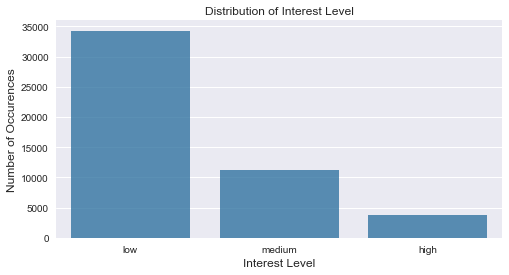

In [15]:
num_level = train['interest_level'].value_counts()
plt.figure(figsize=(8, 4))
sbn.barplot(num_level.index, num_level.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Interest Level', fontsize=12)
plt.title('Distribution of Interest Level')

### `price`
观察`price`的分布情况，以及是否存在异常点。如存在异常点，应将其去除后进一步详细观察。

Text(0.5,1,'Distribution of Price')

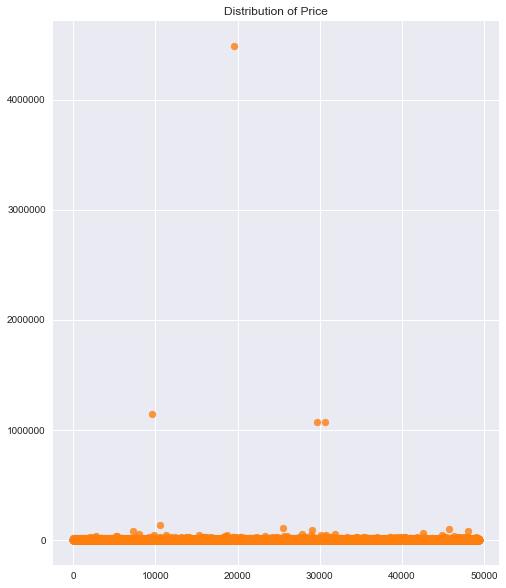

In [16]:
plt.figure(figsize=(8, 10))
plt.scatter(range(train.shape[0]), train['price'].values, color=color[1], alpha=0.8)
plt.title('Distribution of Price')

从图中看到仅有几个离群点，导致大部分数据分布状况细节的丢失，因此我们需要将其去除。

Text(0.5,1,'Distribution of Price - After removing the outliers')

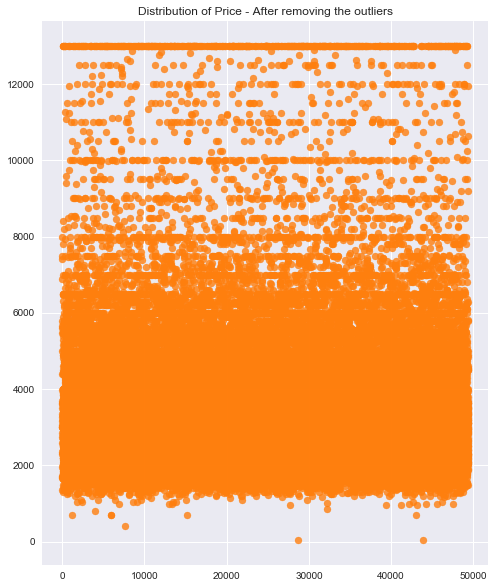

In [17]:
# Remove the outliers
ulimit = np.percentile(train['price'].values, 99)
train['price'].iloc[train['price'].values>ulimit] = ulimit
plt.figure(figsize=(8, 10))
plt.scatter(range(train.shape[0]), train['price'].values, color=color[1], alpha=0.8)
plt.title('Distribution of Price - After removing the outliers')

### `price` vs. `interest_level`

Text(0.5,1,'Price vs. Interest Level')

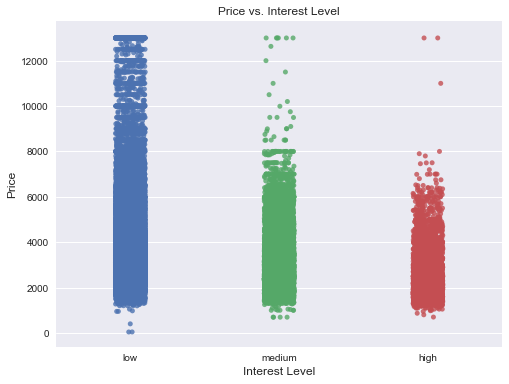

In [18]:
interest_level_order = ['low', 'medium', 'high']
plt.figure(figsize=(8, 6))
sbn.stripplot(train['interest_level'], train['price'], jitter=True, order=interest_level_order, alpha=0.8)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Interest Level', fontsize=12)
plt.title('Price vs. Interest Level')

从上图我们可以看出，`interest_level`值为`high`的数据大部分集中在约(1400, 6200)区间内。

---

### `bathrooms`、`bedrooms`、`num_rooms`、`price_per_rooms`
接下来对四个跟房间数量有关的特征进行可视化分析。

Text(0.5,1,'Distribution of the Number of Bathrooms')

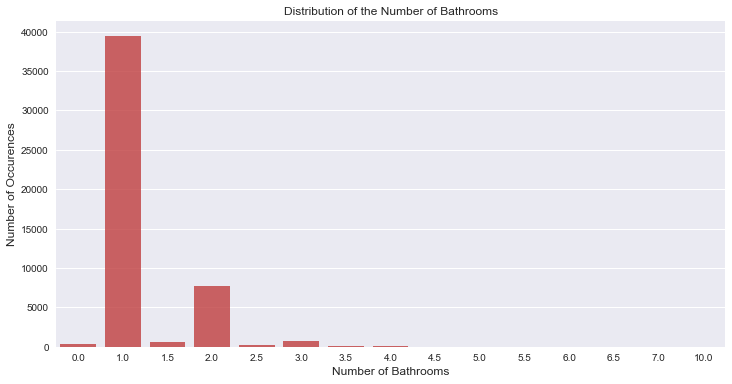

In [19]:
num_bathrooms = train['bathrooms'].value_counts()
plt.figure(figsize=(12, 6))
sbn.barplot(num_bathrooms.index, num_bathrooms.values, alpha=0.8, color=color[3])
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Number of Bathrooms', fontsize=12)
plt.title('Distribution of the Number of Bathrooms')

Text(0.5,1,'Distribution of the Number of Bedrooms')

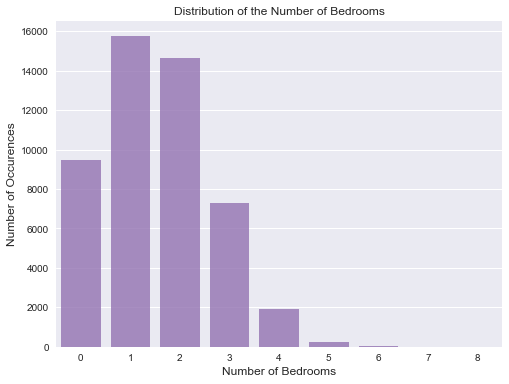

In [20]:
num_bedrooms = train['bedrooms'].value_counts()
plt.figure(figsize=(8, 6))
sbn.barplot(num_bedrooms.index, num_bedrooms.values, alpha=0.8, color=color[4])
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Number of Bedrooms', fontsize=12)
plt.title('Distribution of the Number of Bedrooms')

Text(0.5,1,'Distribution of the Number of Rooms')

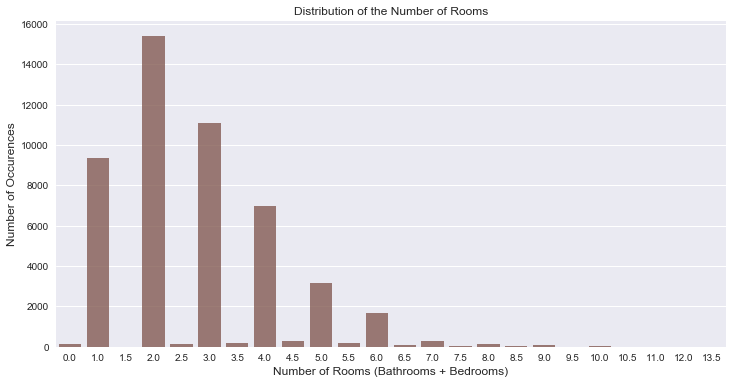

In [21]:
num_rooms = train['num_rooms'].value_counts()
plt.figure(figsize=(12, 6))
sbn.barplot(num_rooms.index, num_rooms.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Number of Rooms (Bathrooms + Bedrooms)', fontsize=12)
plt.title('Distribution of the Number of Rooms')

Text(0.5,0,'Interest Level')

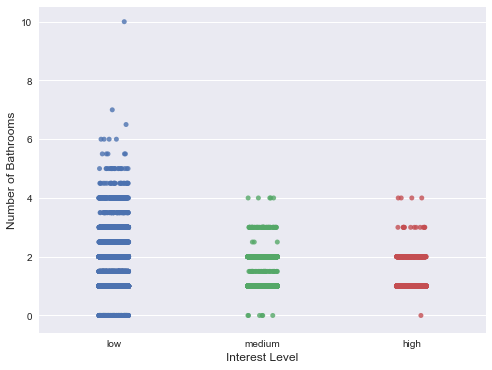

In [22]:
plt.figure(figsize=(8, 6))
sbn.stripplot(train['interest_level'], train['bathrooms'], jitter=True, order=interest_level_order, alpha=0.8)
plt.ylabel('Number of Bathrooms', fontsize=12)
plt.xlabel('Interest Level', fontsize=12)

Text(0.5,0,'Interest Level')

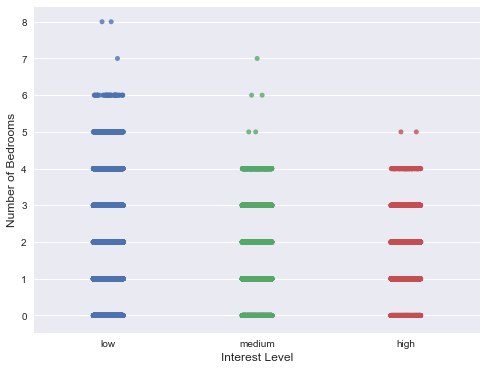

In [23]:
plt.figure(figsize=(8, 6))
sbn.stripplot(train['interest_level'], train['bedrooms'], jitter=True, order=interest_level_order, alpha=0.8)
plt.ylabel('Number of Bedrooms', fontsize=12)
plt.xlabel('Interest Level', fontsize=12)

Text(0.5,0,'Interest Level')

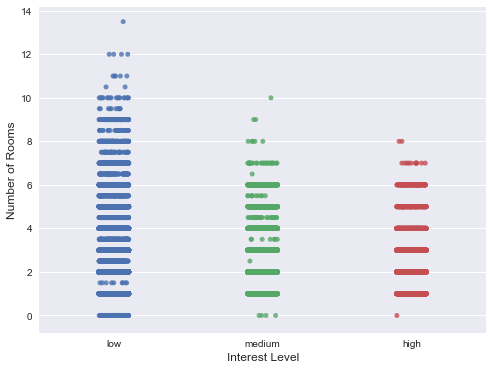

In [24]:
plt.figure(figsize=(8, 6))
sbn.stripplot(train['interest_level'], train['num_rooms'], jitter=True, order=interest_level_order, alpha=0.8)
plt.ylabel('Number of Rooms', fontsize=12)
plt.xlabel('Interest Level', fontsize=12)

Text(0.5,0,'Interest Level')

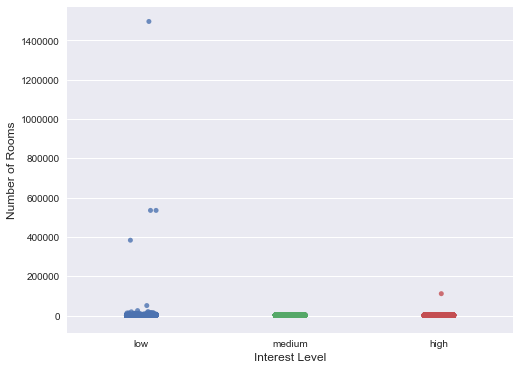

In [25]:
plt.figure(figsize=(8, 6))
sbn.stripplot(train['interest_level'], train['price_per_rooms'], jitter=True, order=interest_level_order, alpha=0.8)
plt.ylabel('Number of Rooms', fontsize=12)
plt.xlabel('Interest Level', fontsize=12)

Text(0.5,0,'Interest Level')

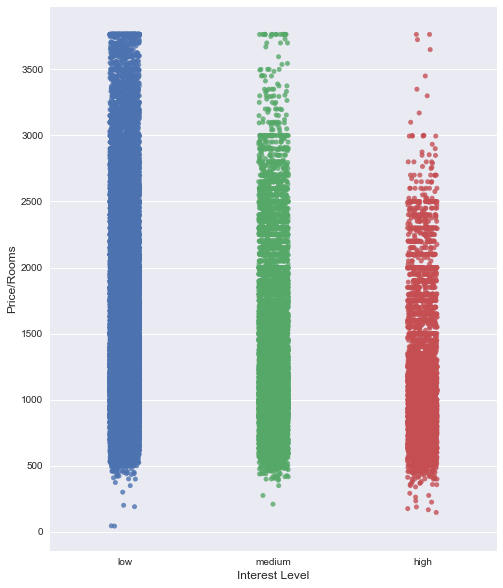

In [26]:
# Remove the outliers
ulimit = np.percentile(train['price_per_rooms'].values, 99)
train['price_per_rooms'].iloc[train['price_per_rooms'].values>ulimit] = ulimit
plt.figure(figsize=(8, 10))
sbn.stripplot(train['interest_level'], train['price_per_rooms'], jitter=True, order=interest_level_order, alpha=0.8)
plt.ylabel('Price/Rooms', fontsize=12)
plt.xlabel('Interest Level', fontsize=12)

### `longitude` & `latitude`
由于经纬度属于真实世界的位置信息，最初的考虑是将其绘制在地图上观察分布，但是没有找到合适的工具，因此只能简单观察这些数据的分布情况。

Text(0.5,0,'Longitude')

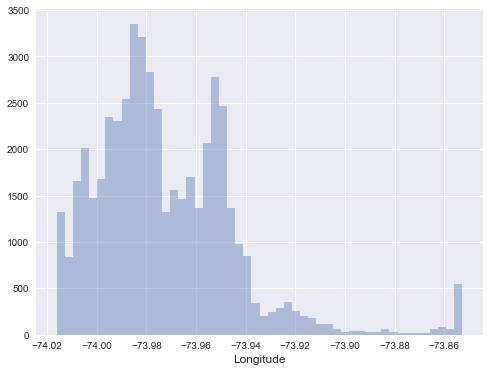

In [27]:
llimit = np.percentile(train['longitude'].values, 1)
ulimit = np.percentile(train['longitude'].values, 99)
train['longitude'].iloc[train['longitude'].values<llimit] = llimit
train['longitude'].iloc[train['longitude'].values>ulimit] = ulimit

plt.figure(figsize=(8, 6))
sbn.distplot(train['longitude'].values, bins=50, kde=False)
plt.xlabel('Longitude', fontsize=12)

Text(0.5,0,'Latitude')

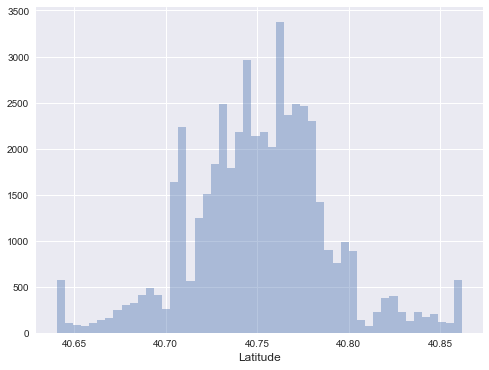

In [28]:
llimit = np.percentile(train['latitude'].values, 1)
ulimit = np.percentile(train['latitude'].values, 99)
train['latitude'].iloc[train['latitude'].values<llimit] = llimit
train['latitude'].iloc[train['latitude'].values>ulimit] = ulimit

plt.figure(figsize=(8, 6))
sbn.distplot(train['latitude'].values, bins=50, kde=False)
plt.xlabel('Latitude', fontsize=12)

**可以发现，经度范围大约在[-74, -73.8]之间，纬度范围大约在[40.6, 40.9]之间。查询地理信息可知，该数据来源属于美国城市纽约。**

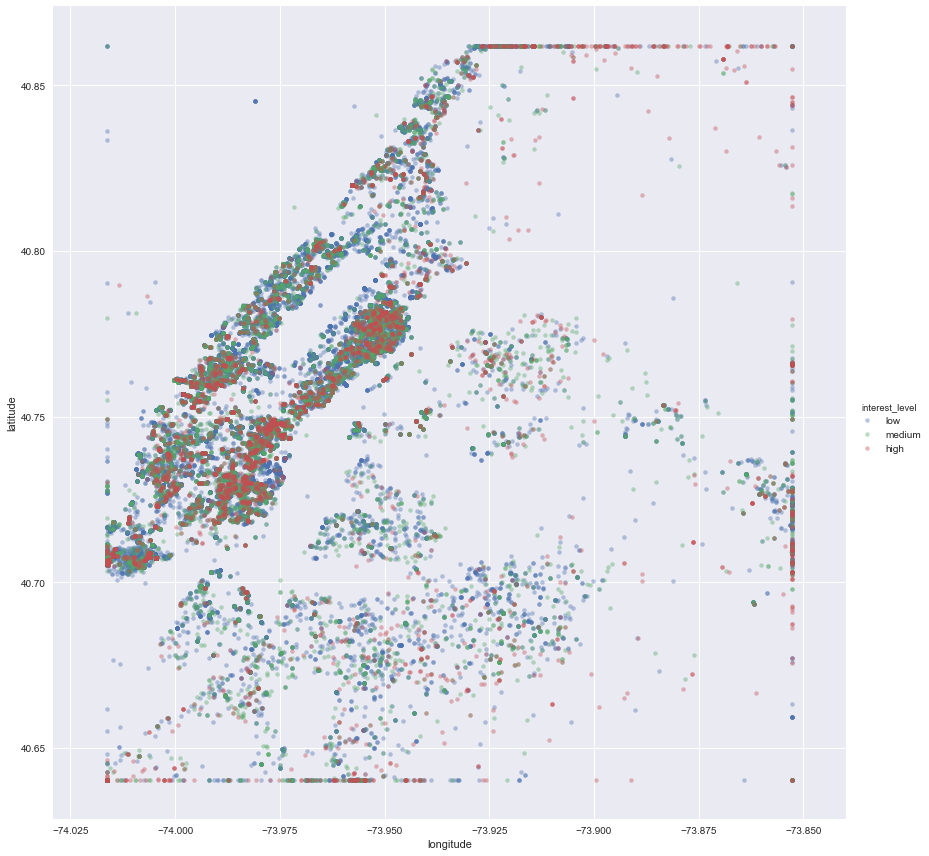

In [29]:
# Draw these points on the map
sbn.lmplot(x='longitude', y='latitude', fit_reg=False, hue='interest_level', hue_order=['low', 'medium', 'high'], size=12,
          scatter_kws={'alpha':0.4, 's':20}, data=train)

### `created`
#### Weekend
前面我们已经创建了`created_year`、`created_month`、`created_day`、`created_hour`等特征，又由上文得知数据来源于美国纽约市，那么可以考虑根据`created_day`判断该数据的创建日期是工作日还是休息日（提取新的特征），再进一步观察该特征是否存在某种模式。

Text(0.5,0,'Is Weekend')

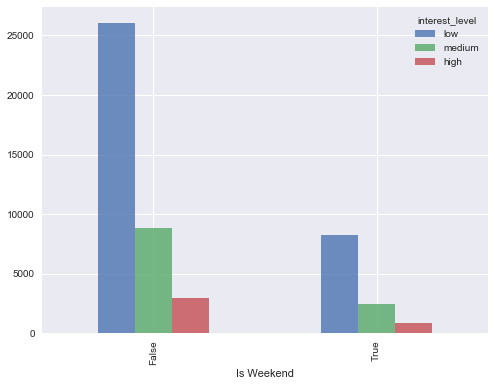

In [30]:
train['created_weekday'] = train['created'].dt.weekday
train['created_weekday_type'] = ((train['created_weekday'] == 5) | (train['created_weekday'] == 6))  # 0 for workday, 1 for weekend

weekday_df = train.groupby(['created_weekday_type', 'interest_level'])['created_weekday_type'].count().unstack('interest_level')
weekday_df[['low', 'medium', 'high']].plot(kind='bar', figsize=(8, 6), alpha=0.8)
plt.xlabel('Is Weekend')

#### Month

Text(0.5,0,'Month')

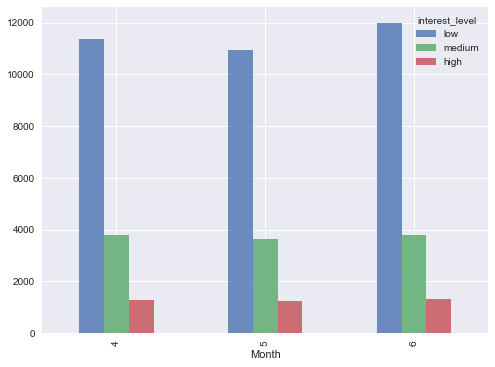

In [31]:
month_df = train.groupby(['created_month', 'interest_level'])['created_month'].count().unstack('interest_level').fillna(0)
month_df[['low','medium',"high"]].plot(kind='bar', figsize=(8, 6), alpha=0.8);
plt.xlabel('Month')

#### Hour

Text(0.5,0,'Hour')

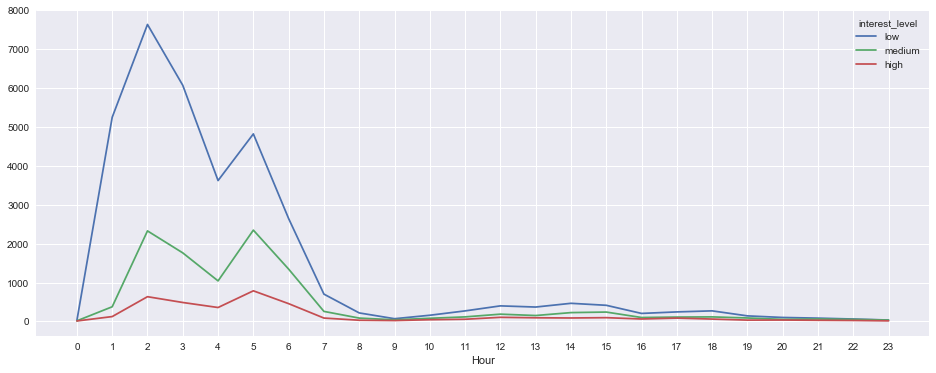

In [32]:
hour_df = train.groupby(['created_hour', 'interest_level'])['created_hour'].count().unstack('interest_level')
hour_df[['low', 'medium', 'high']].plot(kind='line', figsize=(16, 6), xticks=hour_df.index)
plt.xlabel('Hour')

### `photos`
首先观察照片数量的分布情况。

Text(0,0.5,'Number of Occurrences')

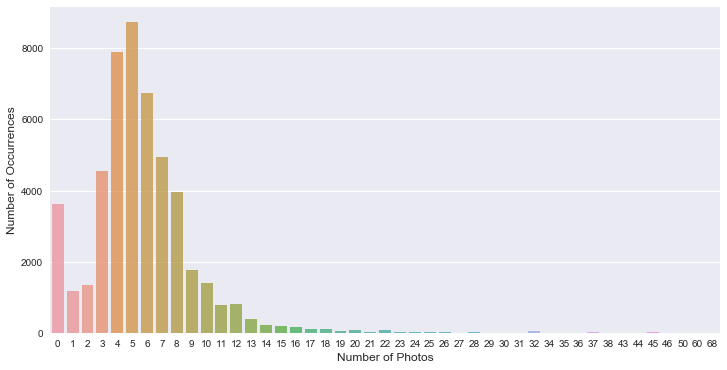

In [33]:
plt.figure(figsize=(12,6))
sbn.barplot(train['num_photos'].value_counts().index, train['num_photos'].value_counts().values, alpha=0.8)
plt.xlabel('Number of Photos', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)

Text(0,0.5,'Interest Level')

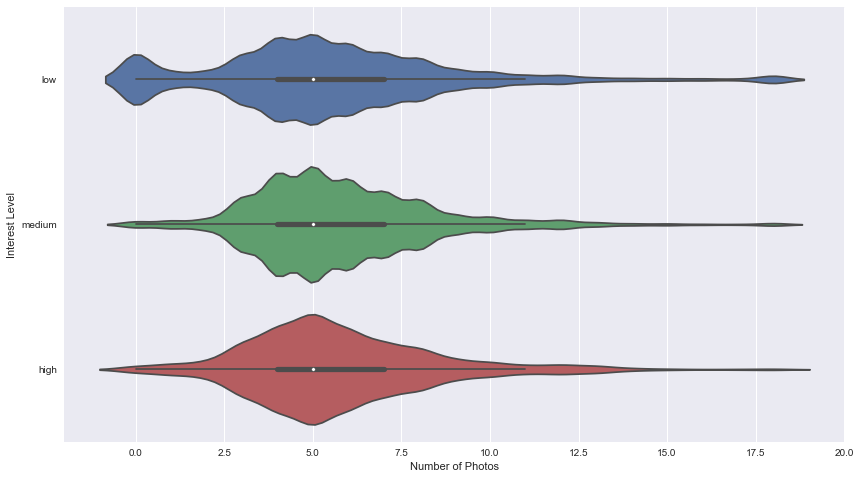

In [34]:
train['num_photos'].iloc[train['num_photos'].values>18] = 18

plt.figure(figsize=(14, 8))
sbn.violinplot(x='num_photos', y='interest_level', data=train, order=interest_level_order)
plt.xlabel('Number of Photos')
plt.ylabel('Interest Level')

### `num_features`
在初步预处理中我们提取了`num_features`特征，接下来就对该特征进行可视化数据探索。

Text(0.5,1,'Distribution of the Number of Features')

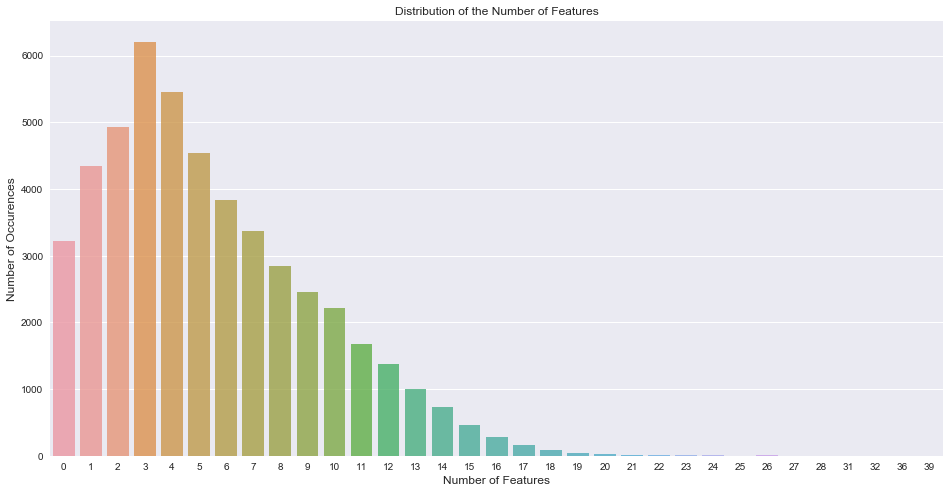

In [35]:
num_features_df = train['num_features'].value_counts()
plt.figure(figsize=(16, 8))
sbn.barplot(num_features_df.index, num_features_df.values, alpha=0.8)
plt.xlabel('Number of Features', fontsize=12)
plt.ylabel('Number of Occurences', fontsize=12)
plt.title('Distribution of the Number of Features')

Text(0.5,1,'Number of Features vs. Interest Level')

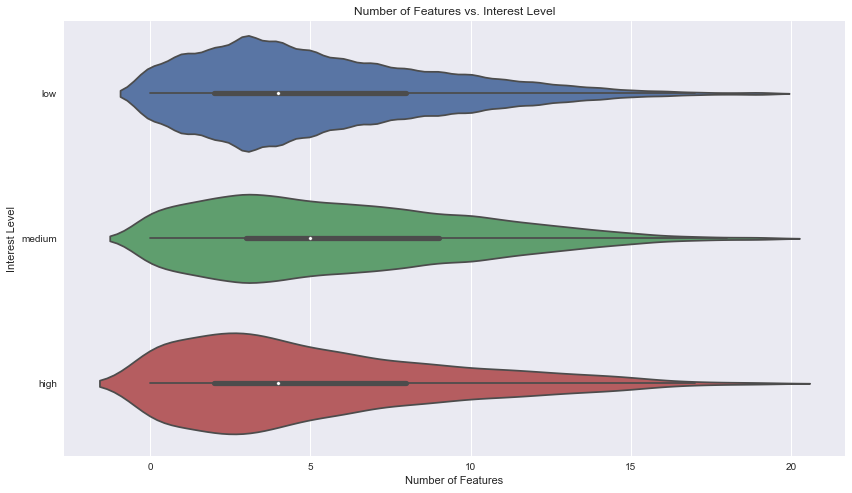

In [36]:
train['num_features'].iloc[train['num_features'].values>19] = 19

plt.figure(figsize=(14, 8))
sbn.violinplot(x='num_features', y='interest_level', data=train, order=interest_level_order)
plt.xlabel('Number of Features')
plt.ylabel('Interest Level')
plt.title('Number of Features vs. Interest Level')

### 文本型数据：`features`、`description`、`display_address`
上文中我们已经将除了ID型数据之外的数值型数据都做了可视化的探索，接下来则针对文本型数据进行可视化处理，词云是一个很好的选择。

在文本型数据中，由于经纬度信息已经能够说明房屋的地理位置与目标变量的关系，因此对`street_address`不再进行可视化探索。

在生成词云前，需要先进行一定的预处理。

In [37]:
# Run these codes will cost a lot of time
str_features = ''
str_description = ''
str_dis_addr = ''

for i, row in train.iterrows():
    for feature in row['features']:
        str_features = ' '.join([str_features, '_'.join(feature.strip().split(' '))])
    str_description = ' '.join([str_description, row['description']])
    str_dis_addr = ' '.join([str_dis_addr, '_'.join(row['display_address'].strip().split(' '))])

str_features = str_features.strip()
str_description = str_description.strip()
str_dis_addr = str_dis_addr.strip()

#### `features`

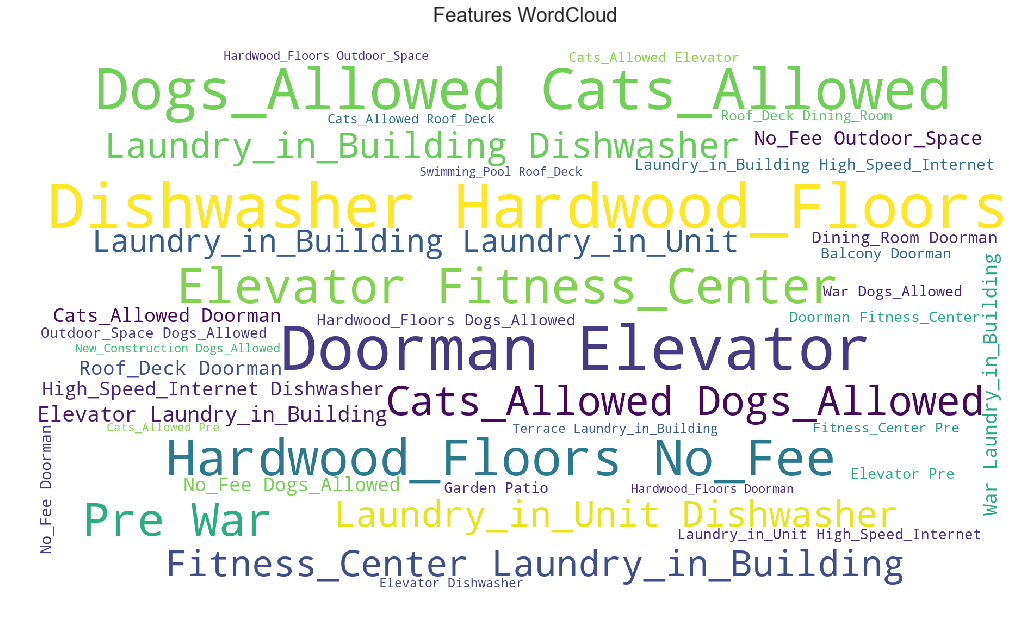

In [38]:
plt.figure(figsize=(18, 10))
wordcloud = WordCloud(background_color='white',width=1800, height=1000, max_words=40).generate(str_features)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Features WordCloud\n', fontsize=20)
plt.show()

#### `display_address`

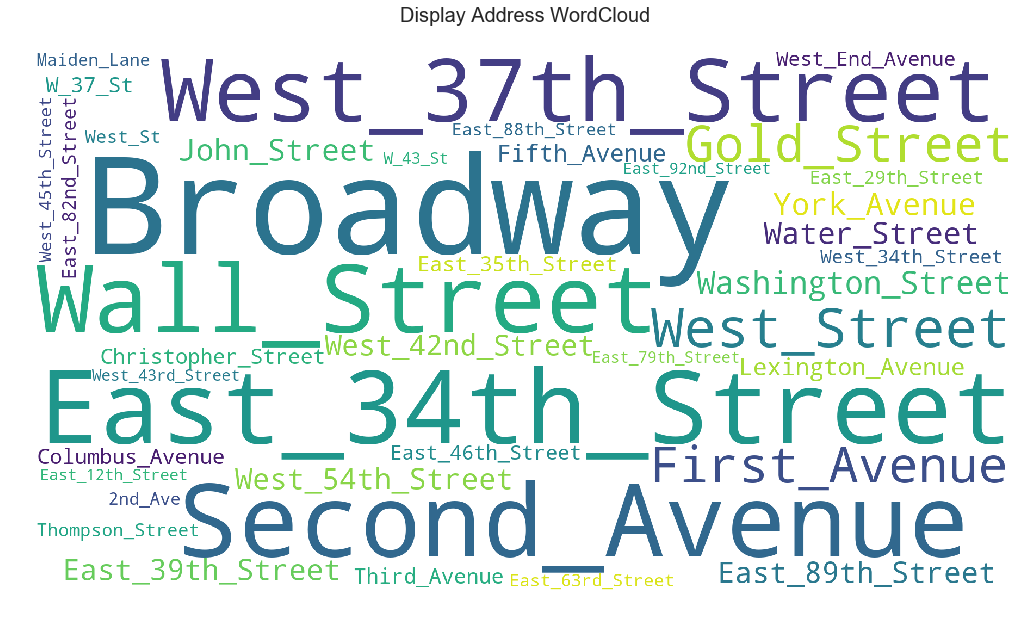

In [39]:
plt.figure(figsize=(18, 10))
wordcloud = WordCloud(background_color='white',width=1800, height=1000, max_words=40).generate(str_dis_addr)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Display Address WordCloud\n', fontsize=20)
plt.show()

#### `description`

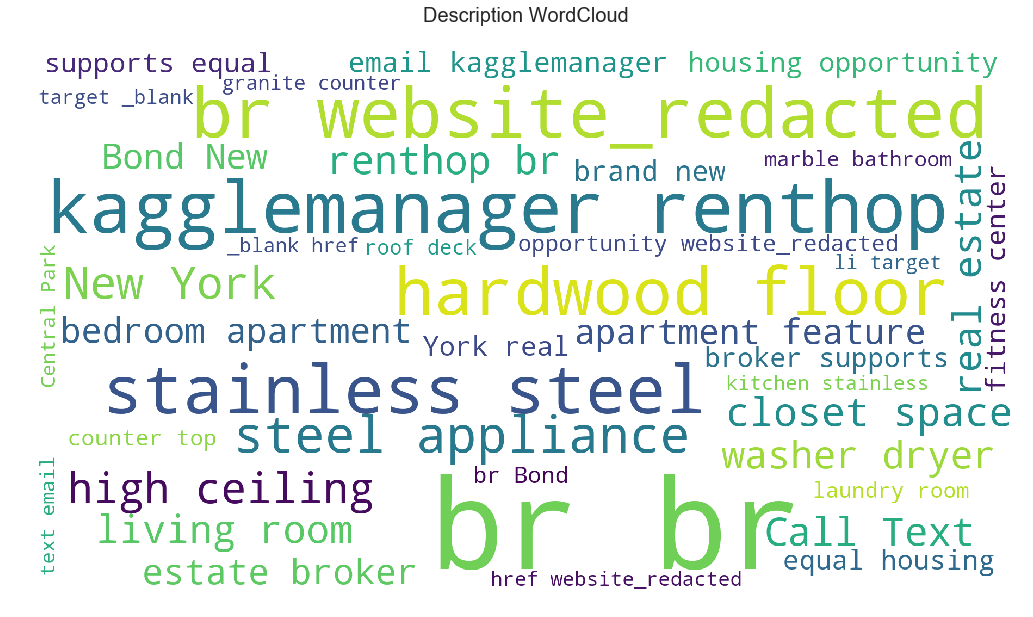

In [40]:
plt.figure(figsize=(18, 10))
wordcloud = WordCloud(background_color='white',width=1800, height=1000, max_words=40).generate(str_description)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Description WordCloud\n', fontsize=20)
plt.show()

## 小结
本报告对Kaggle比赛案例：Rental Listing Inquiries的训练数据集进行了EDA（探索性数据分析）和FE（特征工程），在对数据预处理后，初步提取了几个特征，并且在后续的EDA工作中，通过对各特征进行可视化处理来观察特征，下面简要总结本次的工作。
#### 原始训练数据及特征

In [41]:
train[['bathrooms', 'bedrooms', 'building_id', 'created', 'description', 'display_address', 'features', 'interest_level', 'latitude', 'listing_id', 'longitude', 'manager_id', 'photos', 'price', 'street_address']].head().T

,10,10000,100004,100007,100013
bathrooms,1.5,1,1,1,1
bedrooms,3,2,1,1,4
building_id,53a5b119ba8f7b61d4e010512e0dfc85,c5c8a357cba207596b04d1afd1e4f130,c3ba40552e2120b0acfc3cb5730bb2aa,28d9ad350afeaab8027513a3e52ac8d5,0
created,2016-06-24 07:54:24,2016-06-12 12:19:27,2016-04-17 03:26:41,2016-04-18 02:22:02,2016-04-28 01:32:41
description,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,,"Top Top West Village location, beautiful Pre-w...",Building Amenities - Garage - Garden - fitness...,Beautifully renovated 3 bedroom flex 4 bedroom...
display_address,Metropolitan Avenue,Columbus Avenue,W 13 Street,East 49th Street,West 143rd Street
features,[],"[Doorman, Elevator, Fitness Center, Cats Allow...","[Laundry In Building, Dishwasher, Hardwood Flo...","[Hardwood Floors, No Fee]",[Pre-War]
interest_level,medium,low,high,low,low
latitude,40.7145,40.7947,40.7388,40.7539,40.8241
listing_id,7211212,7150865,6887163,6888711,6934781


#### EDA&FE后的训练数据及特征

In [42]:
train.head().T

,10,10000,100004,100007,100013
bathrooms,1.5,1,1,1,1
bedrooms,3,2,1,1,4
building_id,53a5b119ba8f7b61d4e010512e0dfc85,c5c8a357cba207596b04d1afd1e4f130,c3ba40552e2120b0acfc3cb5730bb2aa,28d9ad350afeaab8027513a3e52ac8d5,0
created,2016-06-24 07:54:24,2016-06-12 12:19:27,2016-04-17 03:26:41,2016-04-18 02:22:02,2016-04-28 01:32:41
description,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,,"Top Top West Village location, beautiful Pre-w...",Building Amenities - Garage - Garden - fitness...,Beautifully renovated 3 bedroom flex 4 bedroom...
display_address,Metropolitan Avenue,Columbus Avenue,W 13 Street,East 49th Street,West 143rd Street
features,[],"[Doorman, Elevator, Fitness Center, Cats Allow...","[Laundry In Building, Dishwasher, Hardwood Flo...","[Hardwood Floors, No Fee]",[Pre-War]
interest_level,medium,low,high,low,low
latitude,40.7145,40.7947,40.7388,40.7539,40.8241
listing_id,7211212,7150865,6887163,6888711,6934781


#### 关于提取特征的说明
- `num_photos`：照片的数量
- `num_features`：特征（词）的数量
- `num_description_words`：描述中词的数量
- `num_description_len`：整个描述的字符数量
- `num_rooms`：房间的总数（Bathroom + Bedroom）
- `price_per_rooms`：价格/房间总数
- `created_year`：创建房屋信息的年份
- `created_month`：创建房屋信息的月份
- `created_day`：创建房屋信息的日
- `created_hour`：创建房屋信息的时
- `created_weekday`：创建房屋信息的日期是星期几
- `created_weekday_type`：创建房屋信息的日期是否是休息日（周六/周日）

#### 作业体会
本次作业是对EDA和FE——这两个对数据挖掘而言最基础但也非常重要的任务的一次实践，也是对Kaggle比赛的第一次探索。一开始拿到数据觉得非常迷茫，不知道应该从哪里下手。在认真阅读课件和比赛主页上的一些Discussion和Kernels，学习了他人的EDA&FE工作后，才有一种找到方向的感觉。
总体来说，本次作业中对数据集中的大部分特征都进行了可视化分析，但是仍有一些数据分析得不够深入和彻底，例如对词云的分析不够深入等，还是存在很多不足；好的一方面则是我通过这次作业对使用Python进行数据挖掘有了基础的了解与认识，也对数据挖掘的基础方法有了一定的理解，收获良多